# Correlation between BTC and ICBC price

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

#### Getting data

In [21]:
icbc_data =  yf.download('1398.HK', '2015-01-02', '2017-06-30')
icbc_data.index = pd.to_datetime(icbc_data.index)
icbc_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,5.68,5.78,5.67,5.77,3.617693,316618719
2015-01-05,5.73,5.90,5.71,5.80,3.636503,534408576
2015-01-06,5.70,5.83,5.67,5.71,3.580075,501370676
2015-01-07,5.68,5.80,5.66,5.75,3.605154,326962633
2015-01-08,5.84,5.85,5.70,5.72,3.586344,236272924
...,...,...,...,...,...,...
2017-06-23,5.16,5.25,5.15,5.20,3.656804,253772982
2017-06-26,5.24,5.25,5.22,5.25,3.691967,167086956
2017-06-27,5.25,5.26,5.20,5.22,3.670868,188561814


In [22]:
btc_data = pd.read_csv('egc2024/timeseries/external.csv')
btc_data = btc_data.set_index('date')
btc_data.index = pd.to_datetime(btc_data.index)
btc_data

,Unnamed: 0,PriceUSD,HashRate
date,,,
2015-01-02,2190,315.942732,3.333450e+05
2015-01-03,2191,285.647310,3.272842e+05
2015-01-04,2192,263.334575,3.474869e+05
2015-01-05,2193,275.003852,3.151626e+05
2015-01-06,2194,287.549521,3.192031e+05
...,...,...,...
2017-06-26,3096,2426.365051,5.023770e+06
2017-06-27,3097,2530.345536,4.634604e+06
2017-06-28,3098,2562.792264,5.554450e+06


In [51]:
merged_data = pd.merge(icbc_data,
                       btc_data,
                       left_index=True,
                       right_on='date',
                       how='left')
merged_data

,Open,High,Low,Close,Adj Close,Volume,Unnamed: 0,PriceUSD,HashRate
date,,,,,,,,,
2015-01-02,5.68,5.78,5.67,5.77,3.617693,316618719,2190,315.942732,3.333450e+05
2015-01-05,5.73,5.90,5.71,5.80,3.636503,534408576,2193,275.003852,3.151626e+05
2015-01-06,5.70,5.83,5.67,5.71,3.580075,501370676,2194,287.549521,3.192031e+05
2015-01-07,5.68,5.80,5.66,5.75,3.605154,326962633,2195,297.535565,2.828382e+05
2015-01-08,5.84,5.85,5.70,5.72,3.586344,236272924,2196,284.342392,2.969801e+05
...,...,...,...,...,...,...,...,...,...
2017-06-23,5.16,5.25,5.15,5.20,3.656804,253772982,3093,2685.870471,5.660586e+06
2017-06-26,5.24,5.25,5.22,5.25,3.691967,167086956,3096,2426.365051,5.023770e+06
2017-06-27,5.25,5.26,5.20,5.22,3.670868,188561814,3097,2530.345536,4.634604e+06


#### Checking price

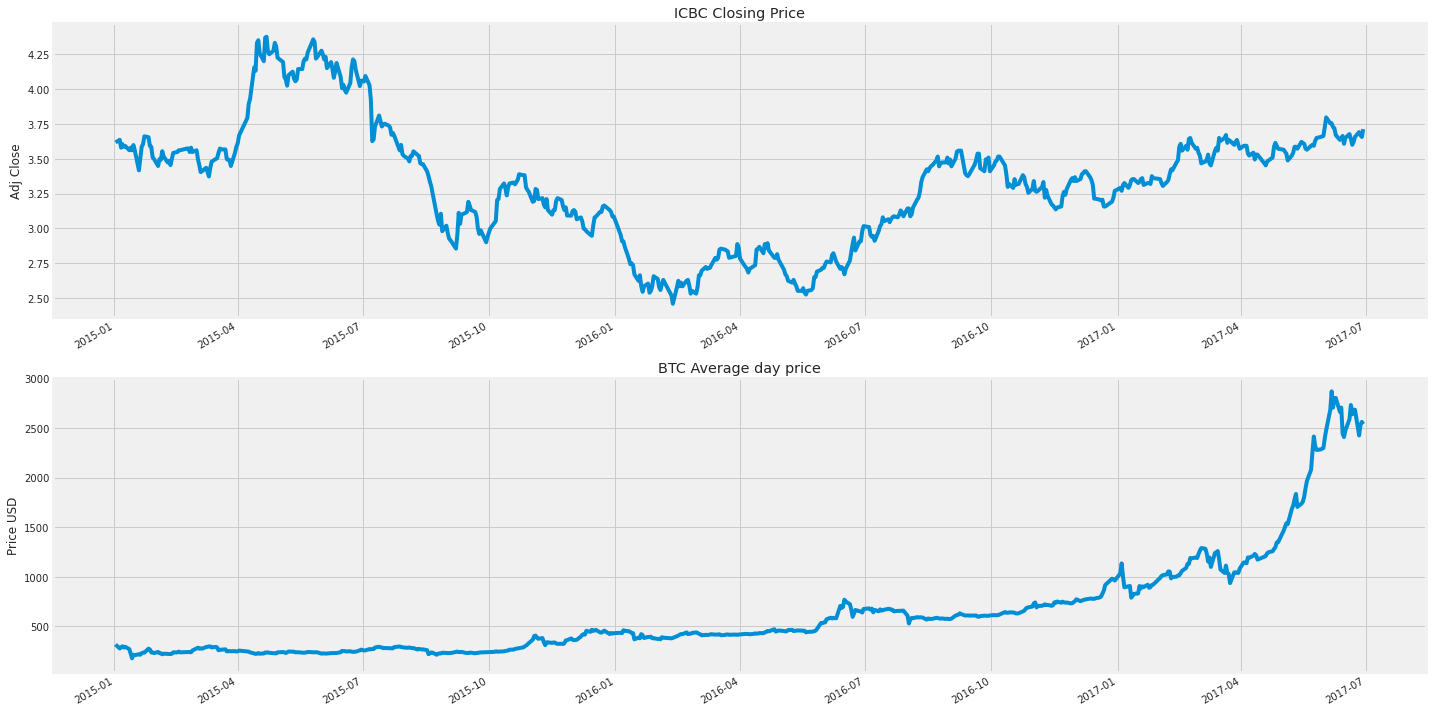

In [56]:
# let's see a historical view of the price
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# ICBC
plt.subplot(2, 1, 1)
merged_data['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title('ICBC Closing Price')

# BTC
plt.subplot(2, 1, 2)
merged_data['PriceUSD'].plot()
plt.ylabel('Price USD')
plt.xlabel(None)
plt.title('BTC Average day price')

plt.tight_layout()

#### Correlation between them

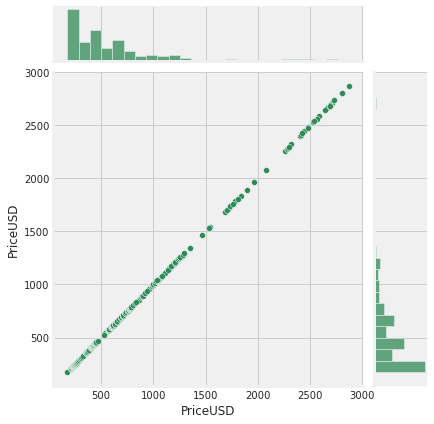

In [41]:
# comparing BTC Price to itself (should be linear)
sns.jointplot(x='PriceUSD', y='PriceUSD', data=merged_data, kind='scatter', color='seagreen')

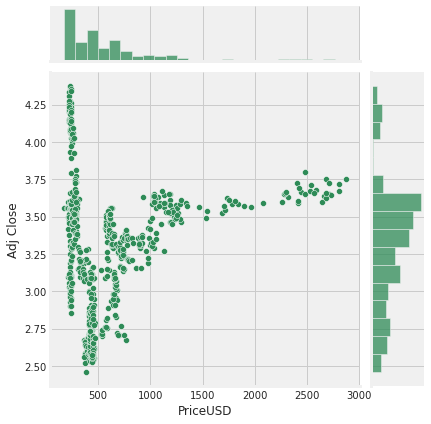

In [46]:
# let's do the same with ICBC price
sns.jointplot(x='PriceUSD', y='Adj Close', data=merged_data, kind='scatter', color='seagreen')

We can see that there is no correlation between them

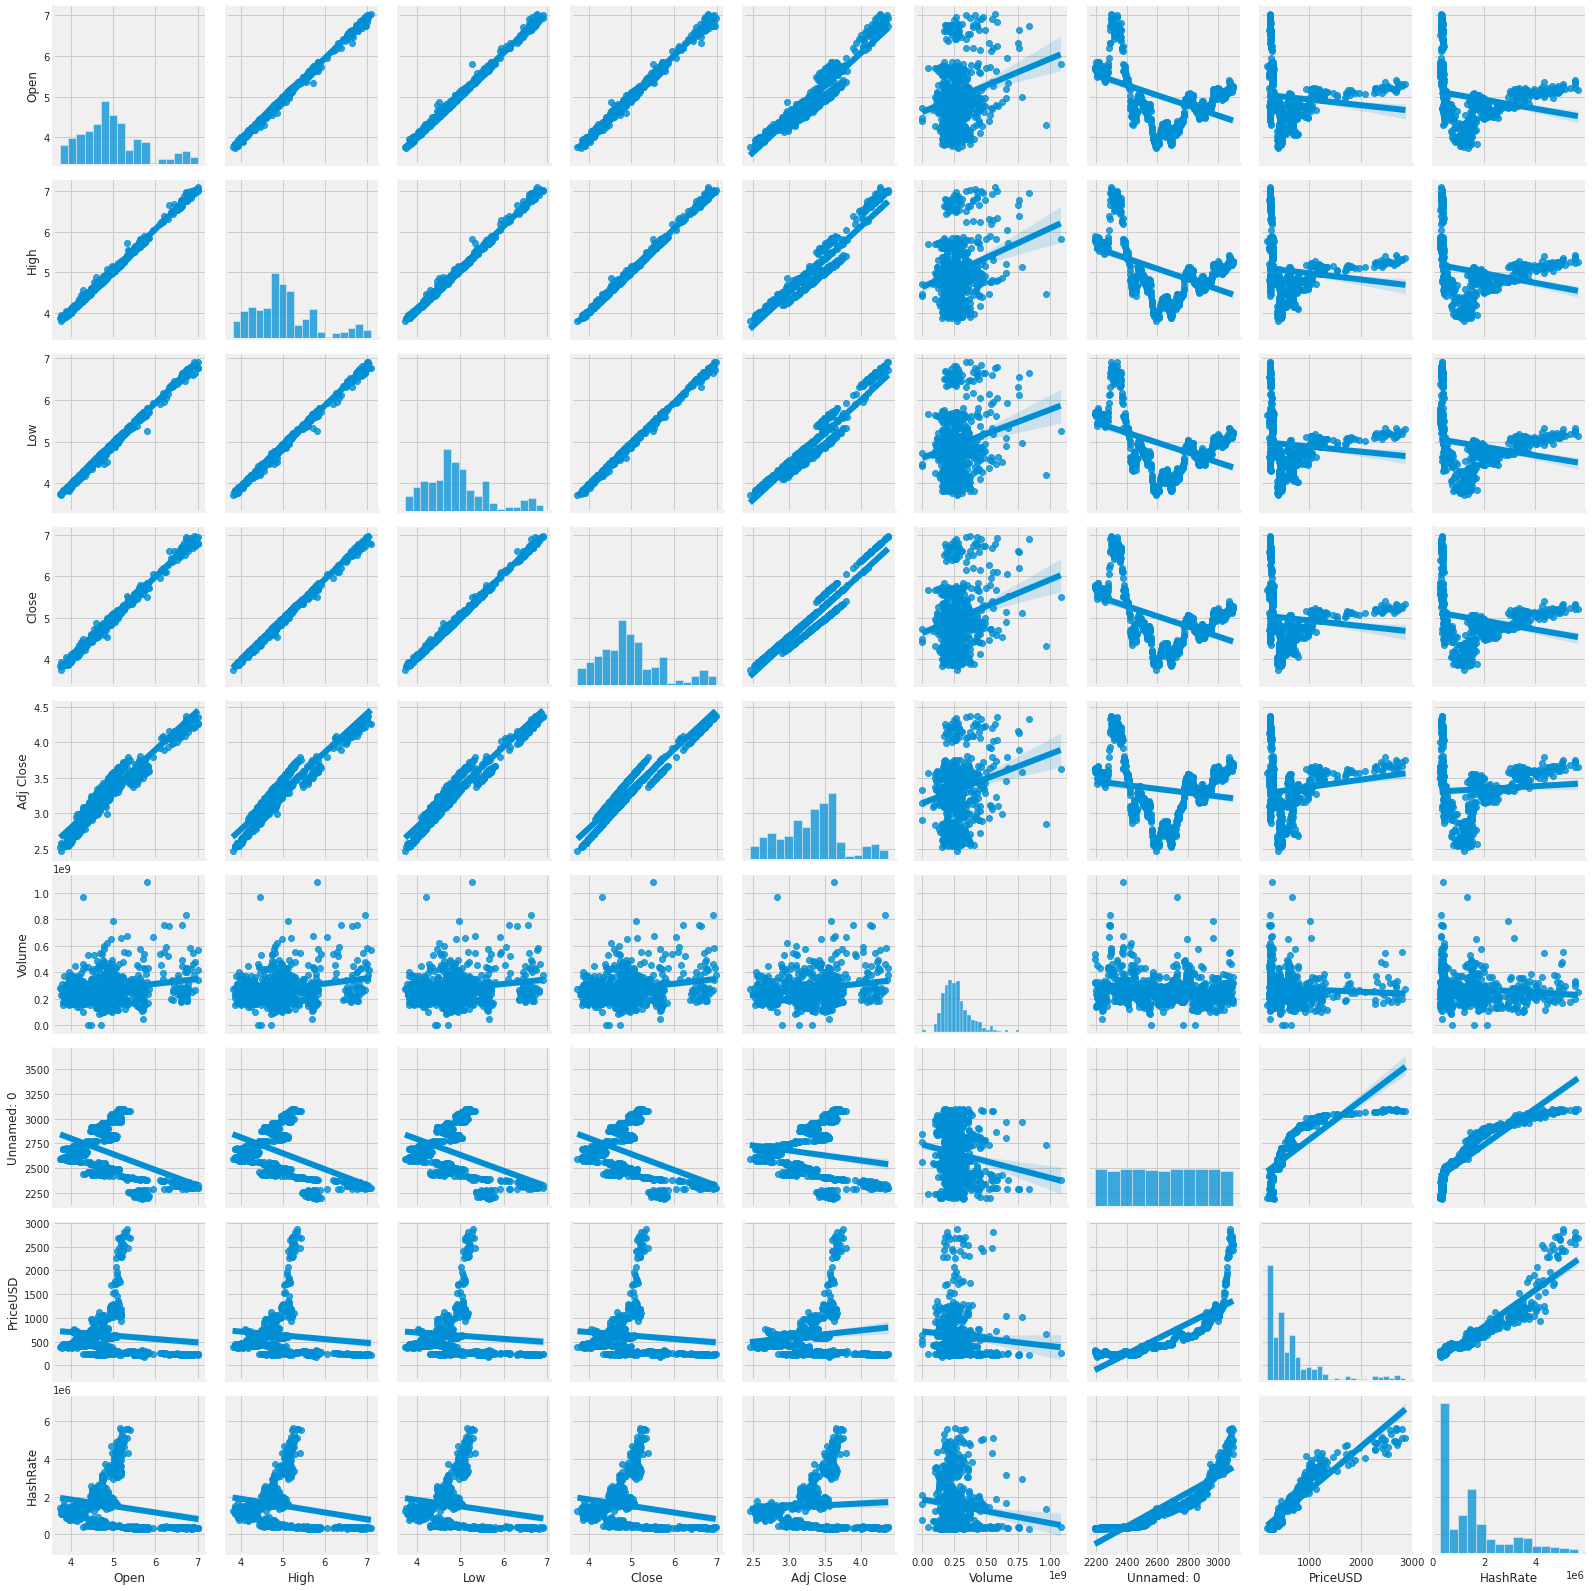

In [47]:
# let's compare all data we have

sns.pairplot(merged_data, kind='reg')